### 🧬 Description du principe utilisé

L'algorithme implémente un **algorithme génétique** pour résoudre le problème du sac à dos (**knapsack problem**). Il s'inspire du processus de sélection naturelle :

1. **Initialisation** : Une population de solutions aléatoires est générée.
2. **Évaluation (fitness)** : Chaque solution est évaluée selon sa valeur totale, en respectant une contrainte de poids.
3. **Sélection** : Les meilleures solutions sont sélectionnées via un **tournoi**.
4. **Recombinaison (croisement)** : Les solutions sélectionnées sont croisées pour créer de nouveaux individus.
5. **Mutation** : De légères modifications (inversions de bits) sont appliquées pour maintenir la diversité.
6. **Itération** : Ce processus se répète sur plusieurs générations pour améliorer les solutions.

🎯 L’objectif est de **maximiser la valeur totale des objets sélectionnés**, sans dépasser le **poids maximal autorisé**.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Charger le fichier de données
df = pd.read_table('dataset', header=None)
df[0:3]


,0
0,200
1,"1, 13, 12, 19, 1, 6, 6, 15, 8, 4, 5, 12, 11, 1..."
2,"7, 3, 5, 7, 9, 1, 18, 12, 12, 19, 1, 18, 12, 1..."


In [27]:
# Extraire les données
W = int(df.iloc[0, 0])  # Poids maximal du sac
v = np.array(df.iloc[1, 0].split(',')).astype(int)  # Valeurs des objets
w = np.array(df.iloc[2, 0].split(',')).astype(int)  # Poids des objets
v.size


40

In [ ]:
# L'algorithme imite la théorie de l'évolution de Darwin en utilisant plusieurs mécanismes clés

# La fonction d'évaluation (Fitness)
# Cette fonction mesure la "qualité" d'une solution x.
#  Si le poids total des objets choisis ne dépasse pas W, la fitness est la somme de leurs valeurs. C'est ce qu'on veut maximise
#  Si le poids total dépasse W, la solution est pénalisée. Avec var=2 (l'option utilisée), 
#  la fitness devient le poids cumulé juste avant de dépasser la limite. C'est une façon de pénaliser les solutions "trop lourdes".

def fitness(x, var):
    poids_total = sum(w[i] * x[i] for i in range(len(w)))
    if poids_total <= W:
        return sum(v[i] * x[i] for i in range(len(v)))
    if var == 1:
        return 0
    if var == 2:
        total, i = 0, 0
        while i < len(w) and total <= W:
            total += w[i] * x[i]
            i += 1
        return total
    raise ValueError(f'paramètre invalide var: {var}, attendu: 1 ou 2')

# Trouver la valeur maximale de fitness dans une population
def max_fitness(population, var):
    return max(fitness(individu, var) for individu in population)

# gen_population(M) : La population initiale
# Crée un groupe de M solutions complètement aléatoires pour démarrer le processus.
def gen_population(M):
    return [np.random.randint(0, 2, len(v)) for _ in range(M)]



In [24]:
# turneu_selection: La sélection par tournoi
# C'est la "survie du plus apte". Pour choisir les parents de la génération suivante :
#  1.On prend un petit groupe d'individus au hasard (de taille number).
#  2.On compare leur fitness.
#  3.Le meilleur du groupe (le "gagnant" du tournoi) est sélectionné.
#  4.On répète l'opération jusqu'à avoir sélectionné la moitié (percentage=0.5) de la population.

def turneu_selection(population, number, percentage, var):
    selected = []
    while len(selected) < int(len(population) * percentage):
        indices = []
        while len(indices) < number:
            idx = np.random.randint(0, len(population))
            if idx not in indices:
                indices.append(idx)
        fitnesses = [fitness(population[idx], var) for idx in indices]
        gagnant = population[indices[np.argmax(fitnesses)]]
        selected.append(gagnant)
    return selected
        
# recombination(el1, el2) : Le croisement (Recombinaison)
# imite la reproduction sexuée pour créer de nouvelles solutions à partir des "parents" sélectionnés :
#   1. On choisit un point de coupure au hasard.
#   2. On crée deux "enfants" en échangeant les gènes des parents à partir de ce point.

def recombination(el1, el2):
    if len(el1) != len(el2):
        raise ValueError("Les deux individus ont des tailles différentes.")
    n = np.random.randint(1, len(el1))  # point de croisement
    return [
        np.concatenate((el1[:n], el2[n:])),
        np.concatenate((el2[:n], el1[n:]))
    ]

# bit_flip(population) : La mutation
# Introduit de la diversité en modifiant aléatoirement un gène (un 0 devient 1 ou l'inverse) dans chaque solution de la population. 
# Cela évite que l'algorithme ne se bloque sur une solution non optimale.
def bit_flip(population):
    for el in population:
        i = np.random.randint(0, len(el))
        el[i] = 1 - el[i]
    return population


    


--- Test M=100, Tournoi=3 ---


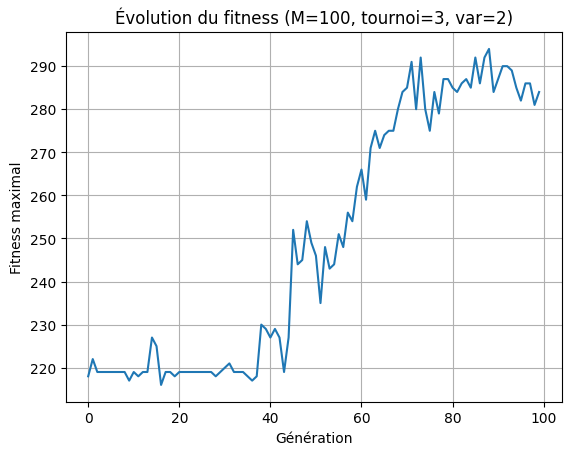

Solution optimale estimée : [0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1]
Valeur totale : 284
Poids total : 193
Objets sélectionnés : [1, 3, 5, 7, 8, 11, 12, 13, 15, 17, 23, 25, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39]
Nombre d'objets sélectionnés : 23

--- Test M=100, Tournoi=5 ---


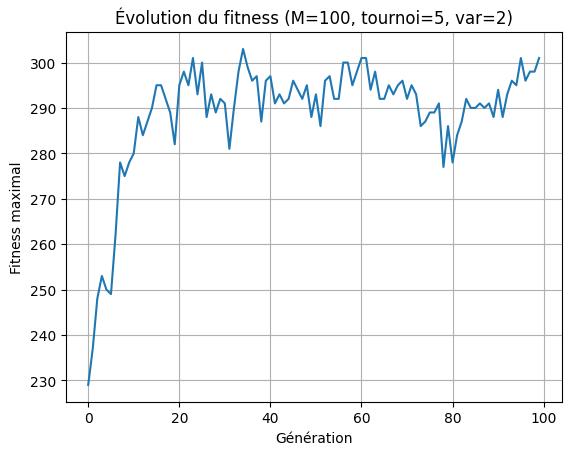

Solution optimale estimée : [0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 301
Poids total : 199
Objets sélectionnés : [1, 2, 3, 5, 7, 8, 10, 12, 13, 15, 17, 19, 20, 22, 23, 25, 27, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 25

--- Test M=100, Tournoi=10 ---


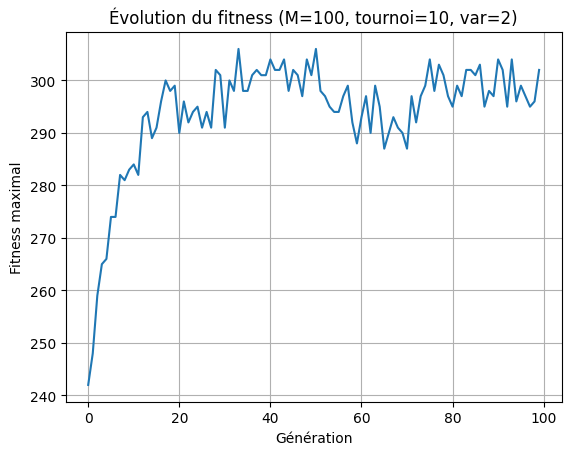

Solution optimale estimée : [0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1
 1 1 1]
Valeur totale : 302
Poids total : 200
Objets sélectionnés : [1, 2, 3, 7, 10, 12, 13, 15, 16, 17, 20, 22, 23, 25, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39]
Nombre d'objets sélectionnés : 24

--- Test M=100, Tournoi=20 ---


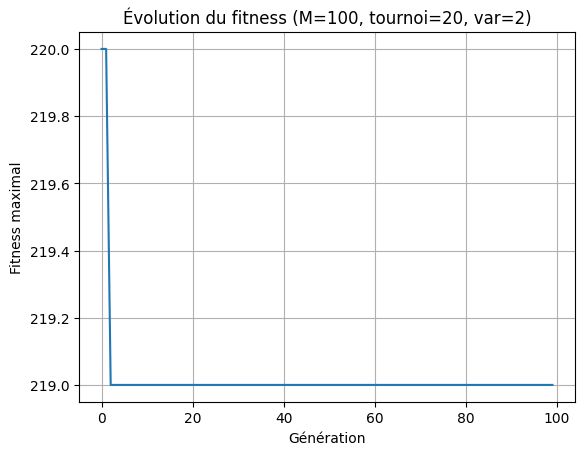

Solution optimale estimée : [1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0
 0 1 1]
Valeur totale : 219
Poids total : 252
Objets sélectionnés : [0, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 17, 18, 19, 20, 23, 24, 27, 28, 29, 31, 34, 38, 39]
Nombre d'objets sélectionnés : 24

--- Test M=200, Tournoi=3 ---


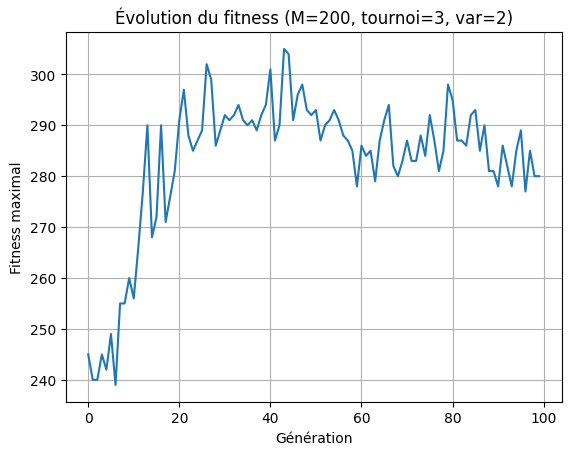

Solution optimale estimée : [1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 280
Poids total : 197
Objets sélectionnés : [0, 1, 2, 3, 5, 7, 8, 11, 13, 14, 16, 17, 20, 23, 27, 28, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 24

--- Test M=200, Tournoi=5 ---


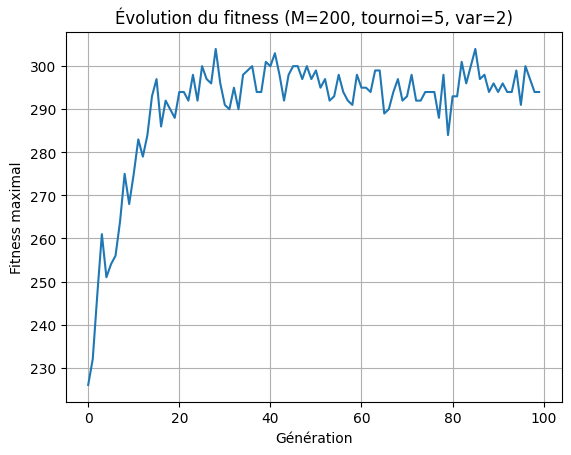

Solution optimale estimée : [0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 0 1 1]
Valeur totale : 294
Poids total : 200
Objets sélectionnés : [1, 2, 3, 5, 7, 10, 11, 12, 13, 15, 17, 19, 20, 22, 23, 25, 26, 28, 29, 30, 32, 33, 35, 38, 39]
Nombre d'objets sélectionnés : 25

--- Test M=200, Tournoi=10 ---


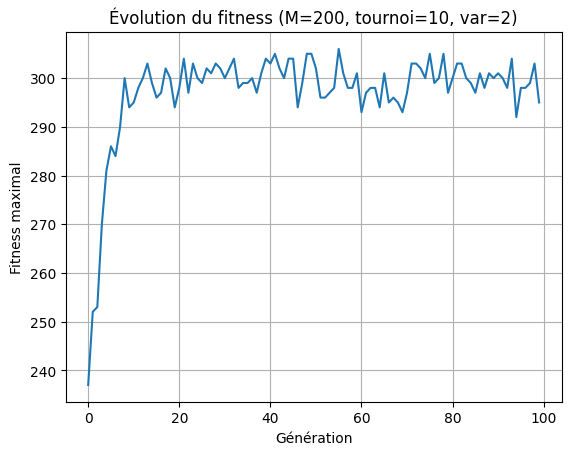

Solution optimale estimée : [0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 295
Poids total : 190
Objets sélectionnés : [1, 2, 3, 5, 7, 10, 12, 13, 14, 15, 16, 17, 20, 23, 25, 28, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 24

--- Test M=200, Tournoi=20 ---


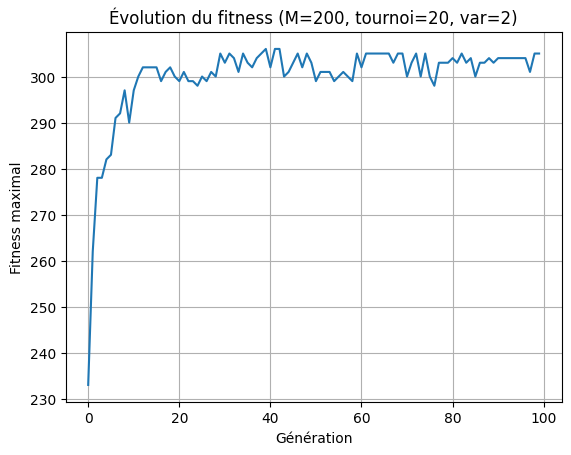

Solution optimale estimée : [0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 305
Poids total : 200
Objets sélectionnés : [1, 2, 3, 5, 7, 8, 10, 12, 13, 14, 15, 17, 20, 22, 23, 25, 27, 28, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 26

--- Test M=500, Tournoi=3 ---


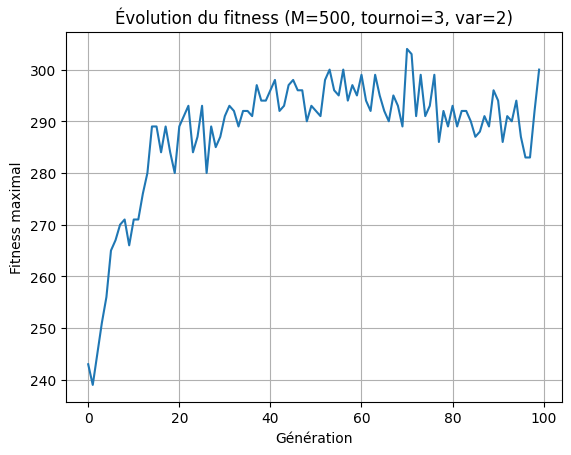

Solution optimale estimée : [0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 300
Poids total : 200
Objets sélectionnés : [1, 2, 3, 5, 7, 10, 11, 12, 13, 14, 17, 20, 22, 23, 25, 27, 28, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 25

--- Test M=500, Tournoi=5 ---


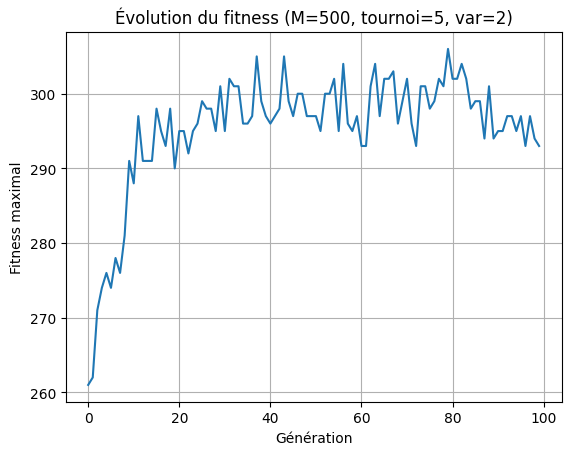

Solution optimale estimée : [0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1]
Valeur totale : 293
Poids total : 194
Objets sélectionnés : [1, 2, 3, 5, 7, 10, 12, 13, 15, 16, 17, 20, 21, 23, 25, 27, 29, 30, 32, 33, 35, 36, 38, 39]
Nombre d'objets sélectionnés : 24

--- Test M=500, Tournoi=10 ---


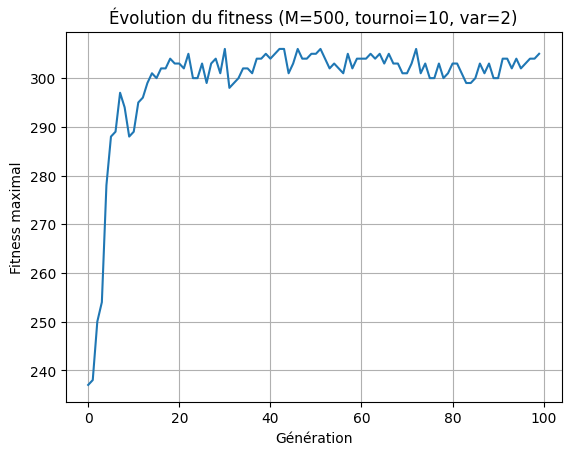

Solution optimale estimée : [0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0
 1 1 1]
Valeur totale : 305
Poids total : 200
Objets sélectionnés : [1, 2, 3, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 22, 23, 25, 27, 29, 30, 32, 33, 35, 37, 38, 39]
Nombre d'objets sélectionnés : 25

--- Test M=500, Tournoi=20 ---


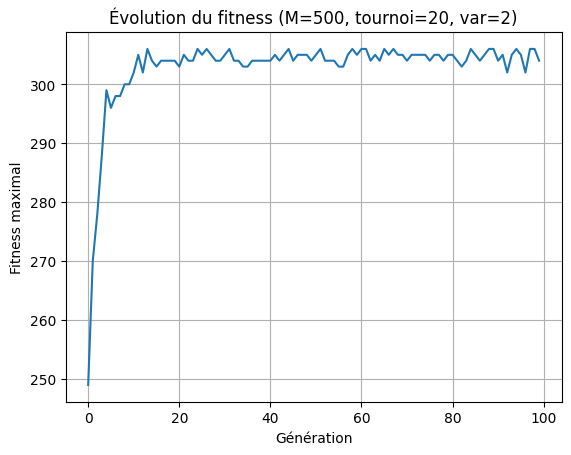

Solution optimale estimée : [0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1]
Valeur totale : 304
Poids total : 196
Objets sélectionnés : [1, 2, 3, 5, 7, 10, 12, 13, 15, 16, 17, 20, 23, 25, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39]
Nombre d'objets sélectionnés : 25


In [28]:
# Il simule l'évolution sur 100 générations :
#   1.Il commence avec une population initiale aléatoire.
#   2.Pour chaque génération (100 fois) : 
#      a. Sélection : Il garde les 50% meilleurs individus grâce à la sélection par tournoi. 
#      b. Reproduction : Il crée de nouveaux individus par croisement (recombination) pour revenir à la taille de population initiale M. 
#      c. Mutation : Il applique de petites mutations aléatoires (bit_flip). d. Suivi : Il note le meilleur score (max_fitness) de la génération.
#   3.À la fin, il affiche un graphique qui montre comment le meilleur score a évolué au fil des générations.
def plot_evolution(M, number, var):
    scores = []
    population = gen_population(M)

    for generation in range(100):
        # Sélection des meilleurs
        population = turneu_selection(population, number, 0.5, var)
        len_p = len(population)

        # Génération de nouveaux individus
        while len(population) < M:
            el1, el2 = np.random.randint(0, len_p), np.random.randint(0, len_p)
            while el1 == el2:
                el2 = np.random.randint(0, len_p)
            enfants = recombination(population[el1], population[el2])
            population.extend(enfants)

        # Mutation
        population = bit_flip(population)

        # Stocker le meilleur score
        scores.append(max_fitness(population, var))

    # Tracer l'évolution du score
    plt.plot(range(len(scores)), scores)
    plt.xlabel("Génération")
    plt.ylabel("Fitness maximal")
    plt.title(f"Évolution du fitness (M={M}, tournoi={number}, var={var})")
    plt.grid()
    plt.show()

    # Afficher la meilleure solution estimée
    meilleur = max(population, key=lambda x: fitness(x, var))
    print("Solution optimale estimée :", meilleur)
    print("Valeur totale :", fitness(meilleur, var))
    print("Poids total :", sum(w[i] * meilleur[i] for i in range(len(w))))
    print("Objets sélectionnés :", [i for i in range(len(v)) if meilleur[i] == 1])
    print("Nombre d'objets sélectionnés :", sum(meilleur))

# Tests pour différentes tailles de population et paramètres de tournoi
for m in [100, 200, 500]:
    for n in [3, 5, 10, 20]:
        print(f"\n--- Test M={m}, Tournoi={n} ---")
        plot_evolution(m, n, var=2)        
